<a href="https://colab.research.google.com/github/RaminTKhameneh/ECG/blob/main/ECG_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import torch
import copy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

from torch import nn, optim
import torch.nn.functional as F
# from arff2pandas import a2p/

In [10]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from re import X
with open('drive/MyDrive/695/ECG5000_TRAIN.txt', 'r') as f:
    train = f.read()

# with open('drive/MyDrive/695/ECG5000_TEST.txt', 'r') as f:
#     test = f.read()

x = []
# file_in = open('drive/MyDrive/695/ECG5000_TRAIN.txt', 'r')
# for y in file_in.read().split(' '):
#     if y.isdigit():
#         x.append(float(y))
for y in train.split('\n'):
  x.append([float(ele) for ele in y.split()])

    # temp.append(float(ele))

  # x.append(temp)
  # break
  # x.append(float(y))

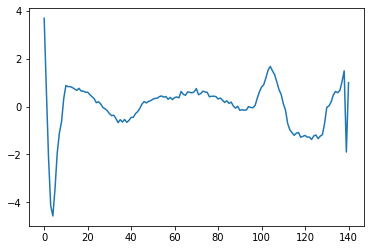

In [ ]:
df = train.append(test)
df = df.sample(frac=1.0)
aa = [3.6908442,0.71141435,-2.1140915,-4.1410068,-4.5744716,-3.4319085,-1.9507914,-1.1070667,-0.63232248,0.33457718,0.87883579,0.83106672,0.83246584,0.79099271,0.73318448,0.67531414,0.76075122,0.64545074,0.64472425,0.59314006,0.60070077,0.4967947,0.40954629,0.33081901,0.15958058,0.20091363,0.10775284,-0.039164736,-0.096833474,-0.17062963,-0.2969516,-0.38126935,-0.36309706,-0.5013618,-0.67307625,-0.55188068,-0.65094102,-0.54260816,-0.66110174,-0.58118387,-0.45428738,-0.45106516,-0.29907368,-0.21448719,-0.076921402,0.10233773,0.20839504,0.15054113,0.21366603,0.24493933,0.30699451,0.33835116,0.34609696,0.41369076,0.44100555,0.39159341,0.41750854,0.30276646,0.38036357,0.28972908,0.37412731,0.39876561,0.36499806,0.63122707,0.50918961,0.46911811,0.61013159,0.59380291,0.56851494,0.6185489,0.75104048,0.49345872,0.53952164,0.64126341,0.60935203,0.59405769,0.40790413,0.42761301,0.43085571,0.41528731,0.31350561,0.35372391,0.26930733,0.16958593,0.2408928,0.13035327,0.18621097,0.024304193,-0.068152656,0.0095436502,-0.16012437,-0.135601,-0.15552812,-0.14475897,-0.00397988,-0.040228089,-0.051341236,0.038336424,0.34101747,0.6159584,0.81549648,0.91215047,1.197038,1.5258563,1.6774093,1.4938024,1.3328849,1.033417,0.70938029,0.50417612,0.12197655,-0.14469165,-0.70622151,-0.97195913,-1.092812,-1.2048382,-1.1141657,-1.0873249,-1.2853534,-1.2481586,-1.2101424,-1.2784696,-1.2789237,-1.3769847,-1.2328171,-1.189943,-1.3444164,-1.2390104,-1.1742654,-0.69966643,-0.032476949,0.022846766,0.18893657,0.48093188,0.62925026,0.57729083,0.66552725,1.0359968,1.4922866,-1.9050734,1]
aa = np.array(aa)
aa.shape
plt.figure()
plt.plot(aa)

In [ ]:
df = train.append(test)
df = df.sample(frac=1.0)
df.shape

(5000, 141)

In [ ]:
df.head()

,att1@NUMERIC,att2@NUMERIC,att3@NUMERIC,att4@NUMERIC,att5@NUMERIC,att6@NUMERIC,att7@NUMERIC,att8@NUMERIC,att9@NUMERIC,att10@NUMERIC,...,att132@NUMERIC,att133@NUMERIC,att134@NUMERIC,att135@NUMERIC,att136@NUMERIC,att137@NUMERIC,att138@NUMERIC,att139@NUMERIC,att140@NUMERIC,"target@{1,2,3,4,5}"
3402,-0.687405,-1.635177,-2.090867,-2.644927,-2.756462,-2.706574,-2.249471,-1.627664,-1.076617,-0.922111,...,-0.412310,-1.049721,-1.771347,-2.614072,-3.673658,-4.085825,-3.662208,-2.496817,-1.766850,4
3838,0.357459,-0.561952,-1.437006,-2.216619,-2.956677,-3.377039,-3.106878,-2.589287,-2.049843,-1.484658,...,-0.166742,-0.900771,-1.523995,-2.231409,-3.013243,-3.791505,-3.525985,-3.270514,-1.783469,2
3206,-0.132425,-1.031795,-1.467015,-2.269255,-2.709373,-2.834432,-2.792092,-2.485924,-2.131087,-1.745533,...,-2.394581,-2.770609,-3.231145,-3.486072,-3.340641,-2.542899,-1.628666,-1.042708,0.453594,2
3035,-1.328559,-2.092583,-2.228079,-2.478665,-2.454419,-2.414983,-2.465589,-2.267049,-1.858301,-1.384742,...,-1.627027,-2.218924,-2.947650,-3.582542,-3.829389,-3.454358,-2.585130,-1.714522,-0.511333,2
3294,0.999864,-0.135817,-1.303317,-2.337855,-2.780836,-2.714102,-2.451485,-2.266064,-1.808928,-1.252465,...,-2.132131,-2.553686,-2.803577,-3.245464,-3.410459,-3.112185,-2.015583,-1.134381,-0.043394,2


In [ ]:
CLASS_NORMAL = 1

class_names = ['Normal','R on T','PVC','SP','UB']

In [ ]:
new_columns = list(df.columns)
new_columns[-1] = 'target'
df.columns = new_columns

In [ ]:
df.target.value_counts()

1    2919
2    1767
4     194
3      96
5      24
Name: target, dtype: int64

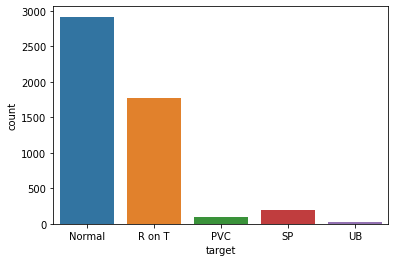

In [ ]:
ax = sns.countplot(df.target)
ax.set_xticklabels(class_names);

In [ ]:
def plot_time_series_class(data, class_name, ax, n_steps=10):
    
    time_series_df = pd.DataFrame(data)

    smooth_path = time_series_df.rolling(n_steps).mean()
    path_deviation = 2 * time_series_df.rolling(n_steps).std()

    under_line = (smooth_path - path_deviation)[0]
    over_line = (smooth_path + path_deviation)[0]

    ax.plot(smooth_path, linewidth=2)
    ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
    )
    ax.set_title(class_name)

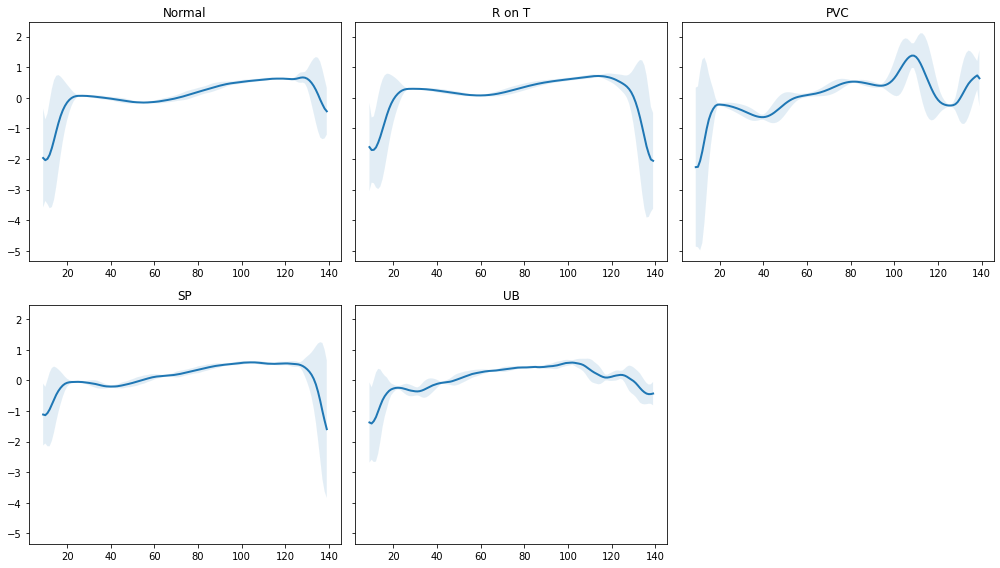

In [ ]:
classes = df.target.unique()

fig, axs = plt.subplots(
    nrows=len(classes) // 3 + 1,
    ncols=3,
    sharey=True,
    figsize=(14, 8)
    )

for i, cls in enumerate(classes):
    ax = axs.flat[i]
    data = df[df.target == cls] \
    .drop(labels='target', axis=1) \
    .mean(axis=0) \
    .to_numpy()
    plot_time_series_class(data, class_names[i], ax)

fig.delaxes(axs.flat[-1])
fig.tight_layout();

In [ ]:
normal_df = df[df.target == str(CLASS_NORMAL)].drop(labels='target', axis=1)
normal_df.shape

(2919, 140)

In [ ]:
anomaly_df = df[df.target != str(CLASS_NORMAL)].drop(labels='target', axis=1)
anomaly_df.shape

(2081, 140)

In [ ]:
train_df, val_df = train_test_split(
  normal_df,
  test_size=0.15,
  random_state=RANDOM_SEED
)

val_df, test_df = train_test_split(
  val_df,
  test_size=0.33, 
  random_state=RANDOM_SEED
)

In [ ]:
def create_dataset(df):

    sequences = df.astype(np.float32).to_numpy().tolist()

    dataset = [torch.tensor(s).unsqueeze(1).float() for s in sequences]

    n_seq, seq_len, n_features = torch.stack(dataset).shape

    return dataset, seq_len, n_features

In [ ]:
train_dataset, seq_len, n_features = create_dataset(train_df)
val_dataset, _, _ = create_dataset(val_df)
test_normal_dataset, _, _ = create_dataset(test_df)
test_anomaly_dataset, _, _ = create_dataset(anomaly_df)

In [ ]:
class Encoder(nn.Module):

    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(Encoder, self).__init__()

        self.seq_len, self.n_features = seq_len, n_features
        self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim

        self.rnn1 = nn.LSTM(
          input_size=n_features,
          hidden_size=self.hidden_dim,
          num_layers=1,
          batch_first=True
        )

        self.rnn2 = nn.LSTM(
          input_size=self.hidden_dim,
          hidden_size=embedding_dim,
          num_layers=1,
          batch_first=True
        )

    def forward(self, x):
        x = x.reshape((1, self.seq_len, self.n_features))

        x, (_, _) = self.rnn1(x)
        x, (hidden_n, _) = self.rnn2(x)

        return hidden_n.reshape((self.n_features, self.embedding_dim))


In [ ]:
class Decoder(nn.Module):

    def __init__(self, seq_len, input_dim=64, n_features=1):
        super(Decoder, self).__init__()

        self.seq_len, self.input_dim = seq_len, input_dim
        self.hidden_dim, self.n_features = 2 * input_dim, n_features

        self.rnn1 = nn.LSTM(
          input_size=input_dim,
          hidden_size=input_dim,
          num_layers=1,
          batch_first=True
        )

        self.rnn2 = nn.LSTM(
          input_size=input_dim,
          hidden_size=self.hidden_dim,
          num_layers=1,
          batch_first=True
        )

        self.output_layer = nn.Linear(self.hidden_dim, n_features)

    def forward(self, x):
        x = x.repeat(self.seq_len, self.n_features)
        x = x.reshape((self.n_features, self.seq_len, self.input_dim))

        x, (hidden_n, cell_n) = self.rnn1(x)
        x, (hidden_n, cell_n) = self.rnn2(x)
        x = x.reshape((self.seq_len, self.hidden_dim))

        return self.output_layer(x)

In [ ]:
class RecurrentAutoencoder(nn.Module):

    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(RecurrentAutoencoder, self).__init__()

        self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
        self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)

        return x

In [ ]:
model = RecurrentAutoencoder(seq_len, n_features, 128)
model = model.to(device)

In [ ]:
def train_model(model, train_dataset, val_dataset, n_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.L1Loss(reduction='sum').to(device)
    history = dict(train=[], val=[])

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 10000.0

    for epoch in range(1, n_epochs + 1):
        model = model.train()

        train_losses = []
        for seq_true in train_dataset:
            optimizer.zero_grad()

            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)

            loss = criterion(seq_pred, seq_true)

            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        val_losses = []
        model = model.eval()
        with torch.no_grad():
            for seq_true in val_dataset:

                seq_true = seq_true.to(device)
                seq_pred = model(seq_true)

                loss = criterion(seq_pred, seq_true)
                val_losses.append(loss.item())

        train_loss = np.mean(train_losses)
        val_loss = np.mean(val_losses)

        history['train'].append(train_loss)
        history['val'].append(val_loss)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())

        print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

    model.load_state_dict(best_model_wts)
    return model.eval(), history


In [ ]:
model, history = train_model(
  model, 
  train_dataset, 
  val_dataset, 
  n_epochs=150
)

Epoch 1: train loss 26.750366414664782 val loss 24.99452361800158
Epoch 2: train loss 25.60453778397215 val loss 23.71910917718256
Epoch 3: train loss 24.0463570033961 val loss 22.002106760955915
Epoch 4: train loss 23.123932678533244 val loss 21.745284324619956
Epoch 5: train loss 22.478673478472093 val loss 22.429094462671376
Epoch 6: train loss 22.800896657853777 val loss 21.87196264169322
Epoch 7: train loss 21.359366452679524 val loss 20.26831868240044
Epoch 8: train loss 20.79870305067106 val loss 20.249962084122487
Epoch 9: train loss 19.732006306707834 val loss 21.199081987244277
Epoch 10: train loss 19.31336084155967 val loss 19.528842257151425
Epoch 11: train loss 18.497782206160558 val loss 17.807144318017535
Epoch 12: train loss 18.29655397289081 val loss 19.530432453741394
Epoch 13: train loss 18.03609409009387 val loss 18.977113098821544
Epoch 14: train loss 17.5270019686544 val loss 18.637710694973787
Epoch 15: train loss 17.07869011295846 val loss 20.26344471173075
Epoc

In [ ]:
MODEL_PATH = 'model.pth'

torch.save(model, MODEL_PATH)

C:\Users\Mahyar\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type RecurrentAutoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\Mahyar\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\Mahyar\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
def predict(model, dataset):
    predictions, losses = [], []
    criterion = nn.L1Loss(reduction='sum').to(device)
    with torch.no_grad():
        model = model.eval()
        for seq_true in dataset:
            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)

            loss = criterion(seq_pred, seq_true)

            predictions.append(seq_pred.cpu().numpy().flatten())
            losses.append(loss.item())
    return predictions, losses

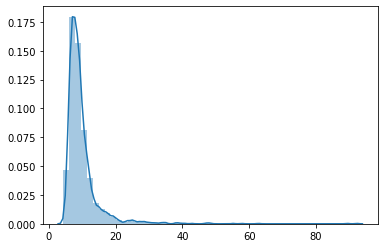

In [ ]:
_, losses = predict(model, train_dataset)

sns.distplot(losses, bins=50, kde=True);

In [ ]:
THRESHOLD = 26

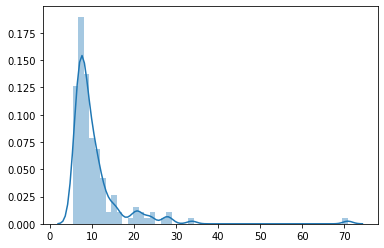

In [ ]:
predictions, pred_losses = predict(model, test_normal_dataset)
sns.distplot(pred_losses, bins=50, kde=True);

In [ ]:
correct = sum(l <= THRESHOLD for l in pred_losses)
print(f'Correct normal predictions: {correct}/{len(test_normal_dataset)}')

Correct normal predictions: 140/145


In [ ]:
anomaly_dataset = test_anomaly_dataset[:len(test_normal_dataset)]

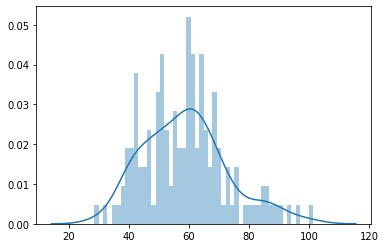

In [ ]:
predictions, pred_losses = predict(model, anomaly_dataset)
sns.distplot(pred_losses, bins=50, kde=True);

In [ ]:
correct = sum(l > THRESHOLD for l in pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anomaly_dataset)}')

Correct anomaly predictions: 145/145


In [ ]:
def plot_prediction(data, model, title, ax):
    predictions, pred_losses = predict(model, [data])

    ax.plot(data, label='true')
    ax.plot(predictions[0], label='reconstructed')
    ax.set_title(f'{title} (loss: {np.around(pred_losses[0], 2)})')
    ax.legend()


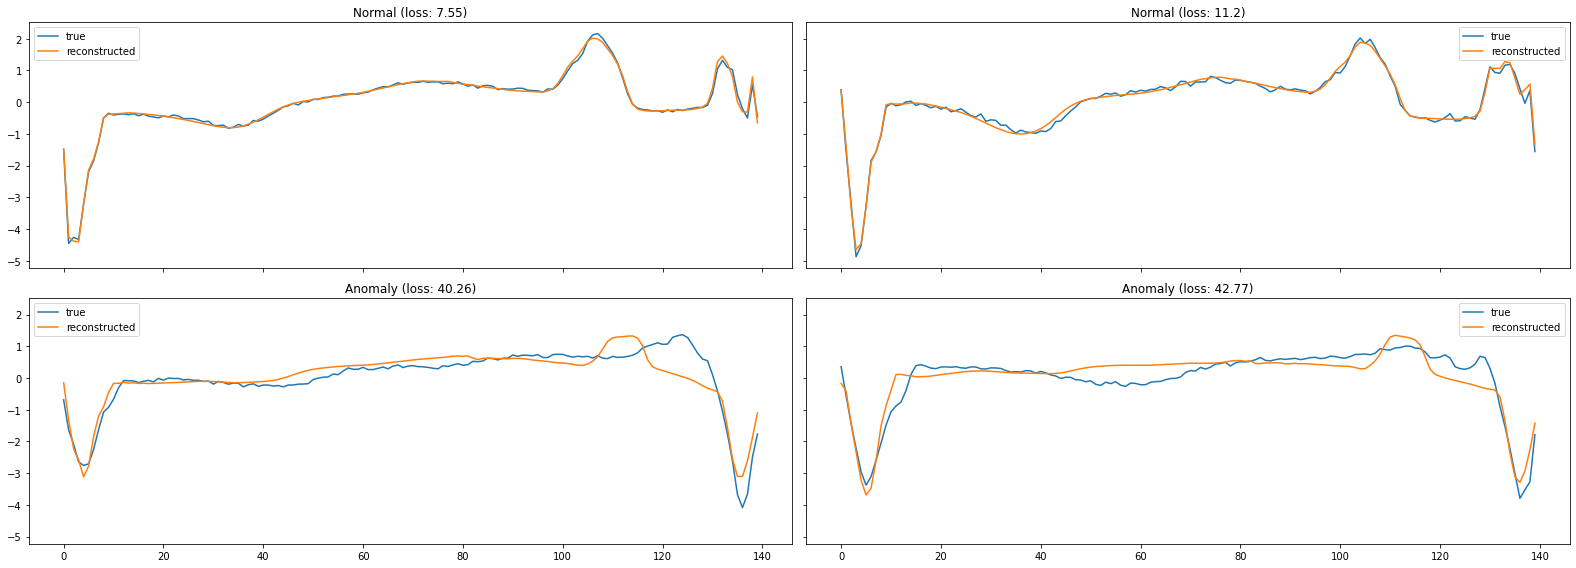

In [ ]:
fig, axs = plt.subplots(
  nrows=2,
  ncols=2,
  sharey=True,
  sharex=True,
  figsize=(22, 8)
)

for i, data in enumerate(test_normal_dataset[:2]):
    plot_prediction(data, model, title='Normal', ax=axs[0, i])

for i, data in enumerate(test_anomaly_dataset[:2]):
    plot_prediction(data, model, title='Anomaly', ax=axs[1, i])

fig.tight_layout();